In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graph
import morsesmale
import scipy.spatial
%matplotlib inline

func = lambda x : x**3 + x**2 - 1*x
points = np.linspace(-2,2,20)
func_vals = [func(x) for x in points]
print(points)
print(func_vals)

[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
[-2.0, -0.73859163143315398, 0.1355882781746609, 0.67852456626330371, 0.94620207027263437, 0.99460562764251348, 0.87972007581280076, 0.65753025222335626, 0.38402099431404008, 0.11517713952471217, -0.093016474704767371, -0.18457501093453857, -0.10351363172474137, 0.20615250036448385, 0.80040822277299828, 1.7352383729406622, 3.0666277883073318, 4.8505613063128701, 7.1430237643971406, 10.0]


In [2]:
pairs = scipy.spatial.distance.pdist(points.reshape(len(points), 1))
pdist = scipy.spatial.distance.squareform(pairs)
G = graph.generate_knn_graph(pdist, 2)
morsesmale.find_extrema(G, pdist, func_vals)
filtrations = morsesmale.get_filtrations(pdist, func_vals, 2)
filtrations

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 5, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 19, 18: 19, 19: 19}
{0: 0, 1: 0, 2: 0, 3: 2, 4: 3, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 11, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18}
new roundnew roundnew round


TypeError: 'float' object is not subscriptable

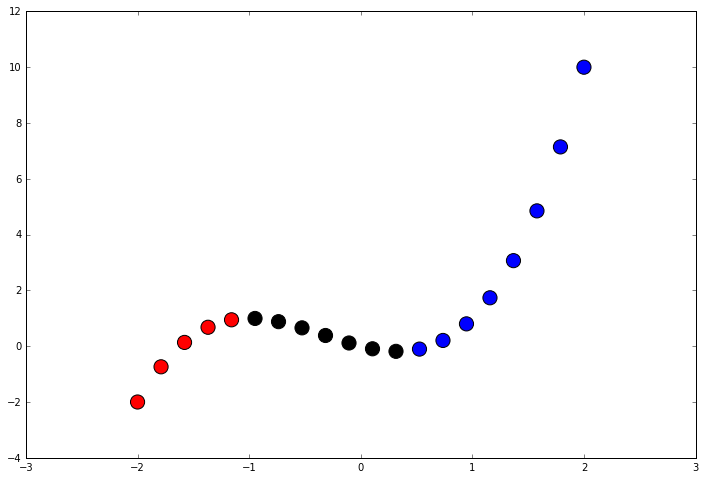

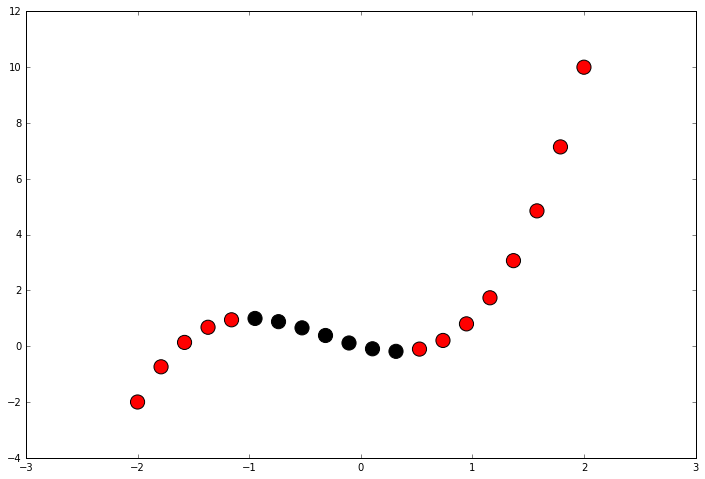

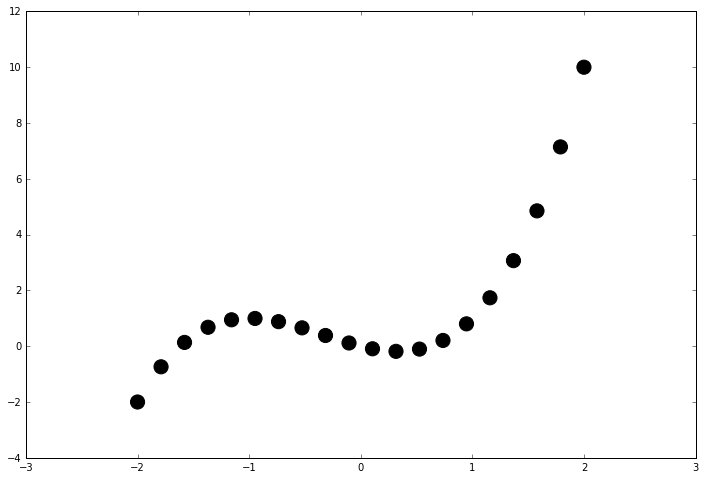

In [3]:
colors = ['r','b','k']
color_map = {crystal:colors[i] for i,crystal in enumerate(filtrations[0])}
for filtration in filtrations:
    reverse_lookup = {}
    for crystal,vertices in filtration.items():
        for v in vertices:
            reverse_lookup[v] = crystal
    c = [color_map[reverse_lookup[v]] for v in range(len(points))]
    plt.scatter(points, func_vals, c=c, s=200)
    plt.gcf().set_size_inches(12,8)
    plt.show()